In [1]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = openml.datasets.get_dataset(712)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,col_1,col_2
0,1,4.4
1,1,3.9
2,1,4.0
3,1,4.0
4,1,3.5


In [3]:
y.head()

0    78
1    74
2    68
3    76
4    80
Name: col_3, dtype: uint8

In [4]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=5,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.3,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.66         0.337183        6         0.928248         0.856862     38.60s
   1    10.57         0.709666       23         0.941159         0.834434     42.95s
   2     9.89         0.742013       11         0.939325         0.840343     48.46s
   3     8.99         0.773503        1         0.940715         0.851029      2.05m
   4     8.22          0.79221       26         0.933616         0.854574      2.40m
   5     8.24         0.804866        2          0.93512         0.862857     41.55s
   6     8.22         0.819254        6         0.932532         0.854283     37.65s
   7     7.49         0.821425       15         0.946135         0.847649     36.27s
   8     7.17         0.824547        2         0.939775         0.854547  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.3, n_components=5, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [5]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6
0,1.0,4.4,1.448315,2.097618,5.848315,1.217212,0.740802
1,1.0,3.9,1.405291,1.974842,5.305291,1.166609,0.680488
2,1.0,4.0,1.414214,2.000000,5.414214,1.177410,0.693147
3,1.0,4.0,1.414214,2.000000,5.414214,1.177410,0.693147
4,1.0,3.5,1.367782,1.870829,4.867782,1.119269,0.626381


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.2,
    p_point_mutation=0.1,
    max_samples=0.5,
    function_set=function_set,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.48          12283.5        9          266.129          257.686      8.03s
   1    14.90          16115.6        3          107.782          128.255     35.27s
   2    21.53           185999       92           57.877          64.4357     42.52s
   3    24.20          88982.6       15          38.6672           47.074     47.89s
   4    18.24          86030.9      100          33.9463          47.3338     43.42s
   5    42.01          41162.8       65          31.6972          49.4849     40.80s
   6    70.64          65470.9       94          30.6529           50.585     40.99s
   7    73.60          85319.6      101          27.7578          53.4429     51.18s
   8    86.16           128225       64          26.4117          54.7718  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min'],
                  max_samples=0.5, metric='mse', n_jobs=-1, p_crossover=0.6,
                  p_hoist_mutation=0.2, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [8]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

182    79.915791
135    55.799979
86     52.412377
65     72.467826
207    51.583261
dtype: float64

In [9]:
y_train.head()

182    82
135    58
86     61
65     72
207    51
Name: col_3, dtype: uint8

In [10]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

154    83.418098
215    52.135314
15     74.578853
173    62.120172
158    83.418098
dtype: float64

In [11]:
y_test.head()

154    81
215    52
15     80
173    60
158    94
Name: col_3, dtype: uint8

In [12]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.7457552687211028
R2 Score of test samples whit the model:  0.8115194567974431


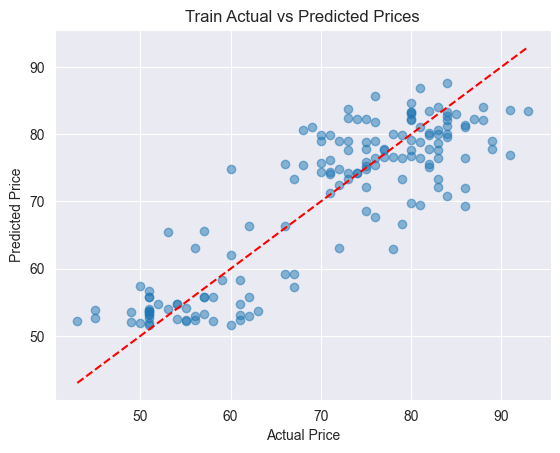

In [13]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

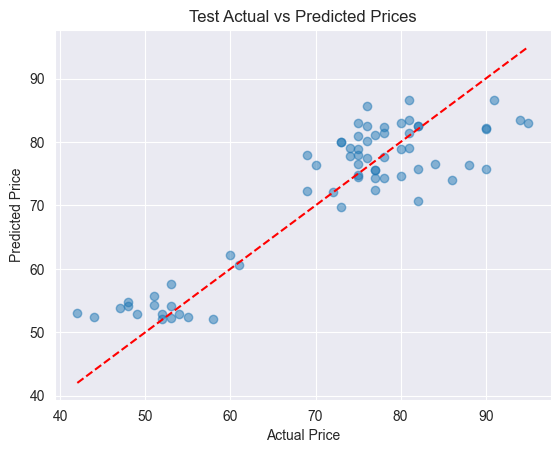

In [14]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()